# "The Offce" - Network Analysis
The goal of the analysis in this notebook is to identify the social interactions between characters in various scenes and to visualize these relationships as a social network graph. 
The analysis focuses on examining how the social network evolves over time, allowing for a deeper understanding of the characters' relationships and dynamics. The 
dataset used in this analysis contains information about the scenes in which each character appears and the other characters with whom they interact. By utilizing network analysis techniques, this notebook aims to provide insights into the complex social relationships within The Office and to highlight key characters and relationships.

In [10]:
import numpy as np
import pandas as pd
import csv

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Import prepared data

In [2]:
PATH = "../data/"
FILE = "unmod_the-office-lines - scripts.csv"

df = pd.read_csv(PATH+FILE, quoting=csv.QUOTE_NONNUMERIC)
df

,id,season,episode,scene,line_text,speaker,deleted
0,1.0,1.0,1.0,1.0,All right Jim. Your quarterlies look very good...,Michael,False
1,2.0,1.0,1.0,1.0,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3.0,1.0,1.0,1.0,So you've come to the master for guidance? Is ...,Michael,False
3,4.0,1.0,1.0,1.0,"Actually, you called me in here, but yeah.",Jim,False
4,5.0,1.0,1.0,1.0,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905.0,9.0,23.0,112.0,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906.0,9.0,23.0,113.0,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907.0,9.0,23.0,114.0,I���m happy that this was all filmed so I can ...,Phyllis,False
59907,59908.0,9.0,23.0,115.0,I sold paper at this company for 12 years. My ...,Jim,False


In [3]:
# group the lines in df to get a list of speakers per scene
speaker = df.groupby(['season', 'episode', 'scene'])['speaker'].apply(set).reset_index(name='speakers')
speaker

,season,episode,scene,speakers
0,1.0,1.0,1.0,"{Jim, Michael}"
1,1.0,1.0,2.0,{Michael}
2,1.0,1.0,3.0,"{Pam, Michael}"
3,1.0,1.0,4.0,{Michael}
4,1.0,1.0,5.0,{Dwight}
...,...,...,...,...
9156,9.0,23.0,112.0,{Creed}
9157,9.0,23.0,113.0,{Meredith}
9158,9.0,23.0,114.0,{Phyllis}
9159,9.0,23.0,115.0,{Jim}


In [43]:
character_edges = {}
for c in speaker['speakers']:
    c = list(c)
    for i in range(len(c)):
        for j in range(i+1, len(c)):
            character_tuple = (c[i], c[j])
            character_tuple_inv = (c[j], c[i])
            if character_tuple in character_edges:
                character_edges[character_tuple] += 1
            elif character_tuple_inv in character_edges:
                character_edges[character_tuple_inv] += 1
            else:
                character_edges[character_tuple] = 1

# only keep edges with more than n interactions
character_edges = {k: v for k, v in character_edges.items() if v > 50}

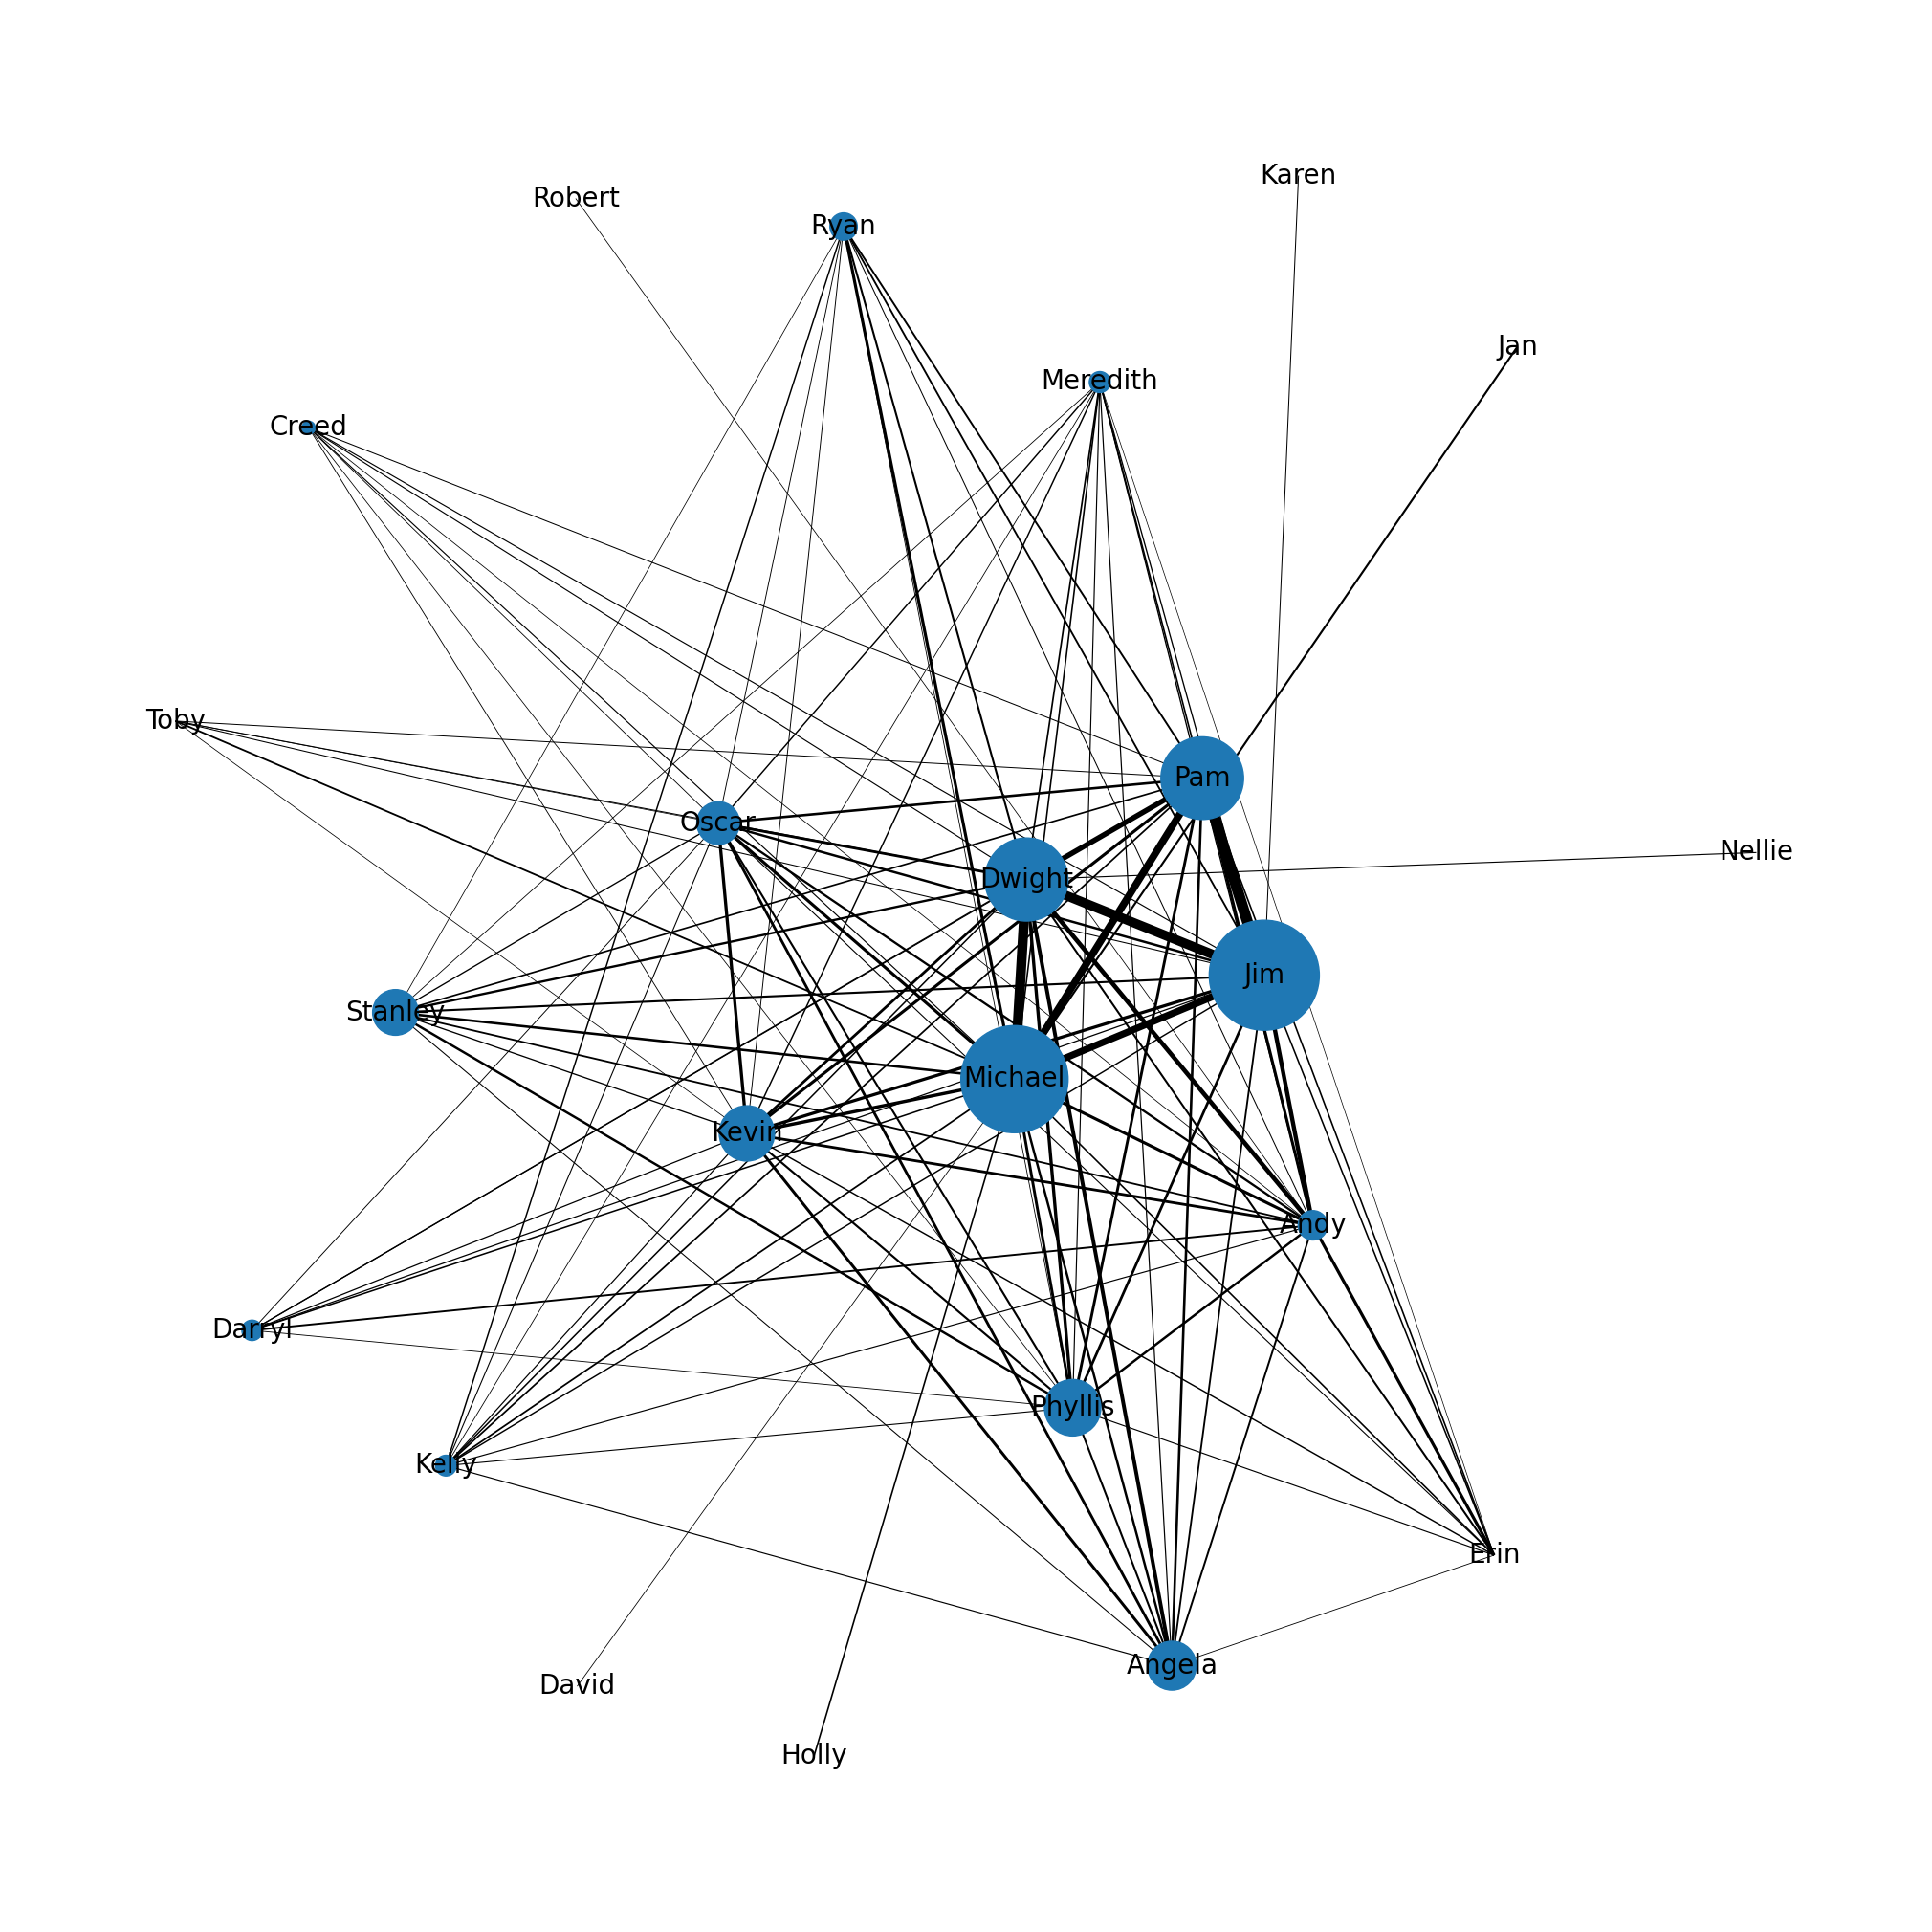

In [55]:
import networkx as nx

graph = nx.Graph()
for character_tuple, count in character_edges.items():
    graph.add_edge(character_tuple[0], character_tuple[1], weight=count)
pos = nx.spring_layout(graph, k=100, iterations=500)
node_weights = [sum([d['weight'] for (u, v, d) in graph.edges(data=True) if u == node]) for node in graph.nodes()]
total_weights = sum(node_weights)
nx.draw(graph, pos, with_labels=True, node_size=[w/total_weights*30000 for w in node_weights], font_size=20,
            edgelist=[(u, v) for (u, v, d) in graph.edges(data=True)],
            width=[0.01*d['weight'] for (u, v, d) in graph.edges(data=True)])
plt.gcf().set_size_inches(20, 20)
plt.show()

In [56]:
# do the above network analysis as sankey diagram  
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = list(graph.nodes()),
        color = "blue"
    ),
    link = dict(
        source = [list(graph.nodes()).index(u) for (u, v, d) in graph.edges(data=True)],
        target = [list(graph.nodes()).index(v) for (u, v, d) in graph.edges(data=True)],
        value = [d['weight'] for (u, v, d) in graph.edges(data=True)]
    ))])

fig.update_layout(title_text="The Office Network Analysis", font_size=10)
fig.show()

In [ ]:
# Idea: Analysis of characters sharing their scenes alone with each other -> strong relationship?

